In [51]:
import pandas as pd
import numpy as np

# Importing Data

In [59]:
d=pd.read_csv("Crop_recommendation.csv")
d.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42.0,20.130175,81.604873,NaN,262.717340,rice


In [60]:
d.shape

(2200, 8)

In [61]:
d.mean()

C:\Users\abhin\AppData\Local\Temp\ipykernel_27704\1214089992.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d.mean()


N               50.551818
P               53.362727
K               48.164695
temperature     25.616244
humidity        71.485105
ph               6.467984
rainfall       103.486263
dtype: float64

In [62]:
d.median()

C:\Users\abhin\AppData\Local\Temp\ipykernel_27704\3286961719.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d.median()


N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.483245
ph              6.423899
rainfall       94.781896
dtype: float64

In [63]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2198 non-null   float64
 3   temperature  2200 non-null   float64
 4   humidity     2198 non-null   float64
 5   ph           2195 non-null   float64
 6   rainfall     2197 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 137.6+ KB


In [64]:
d.isnull().sum()

N              0
P              0
K              2
temperature    0
humidity       2
ph             5
rainfall       3
label          0
dtype: int64

In [68]:
d.fillna(0, inplace=True)

In [69]:
d.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [75]:
d['K'].fillna(d['K'].mean(), inplace=True)
d['humidity'].fillna(d['humidity'].mean(), inplace=True)
d['ph'].fillna(d['ph'].mean(), inplace=True)
d['rainfall'].fillna(d['rainfall'].mean(), inplace=True)

In [106]:
count_K = d['K'].value_counts().get(0, 0)
print(count_K,end=' ')
count_humidity = d['humidity'].value_counts().get(0, 0)
print(count_humidity,end=' ')
count_ph = d['ph'].value_counts().get(0, 0)
print(count_ph,end=" ")
count_rainfall = d['rainfall'].value_counts().get(0, 0)
print(count_rainfall)

0 0 0 0


In [78]:
d.duplicated().sum()

0

In [79]:
d.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.164695,25.616244,71.485105,6.467984,103.486263
std,36.917334,32.985883,50.644201,5.063749,22.260450,0.772646,54.951739
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.275383,5.972172,64.565763
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425675,94.986242
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.920131,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [80]:
columns = ['N','P','K','temperature','humidity','ph','rainfall']

In [81]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='label'>

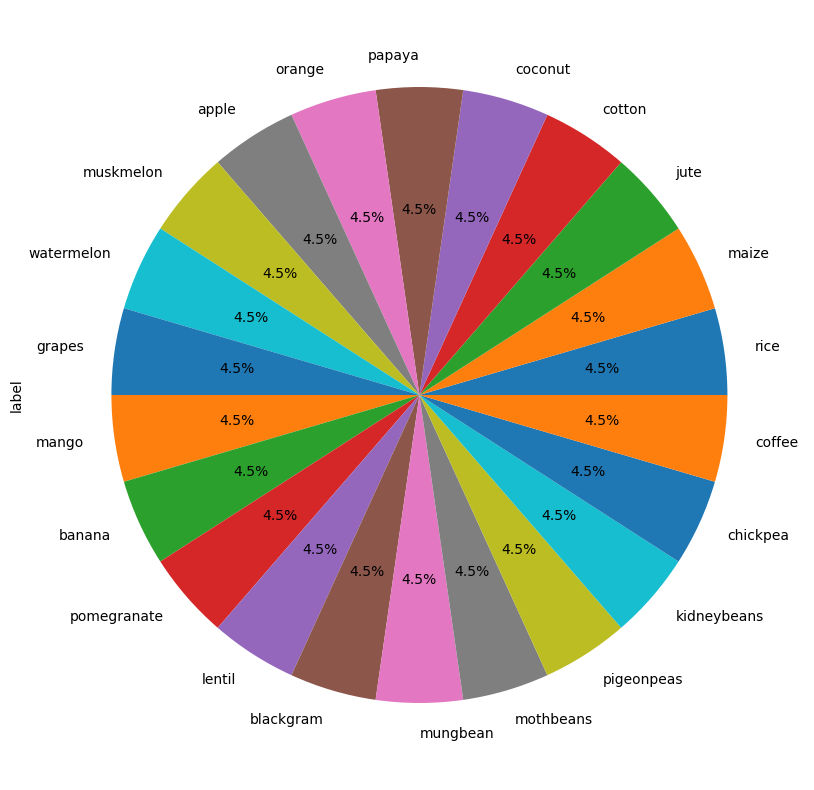

In [82]:
plt.figure(figsize=(10,10))
d['label'].value_counts().plot(kind = 'pie',autopct = '%.1f%%')

In [83]:
import seaborn as sns

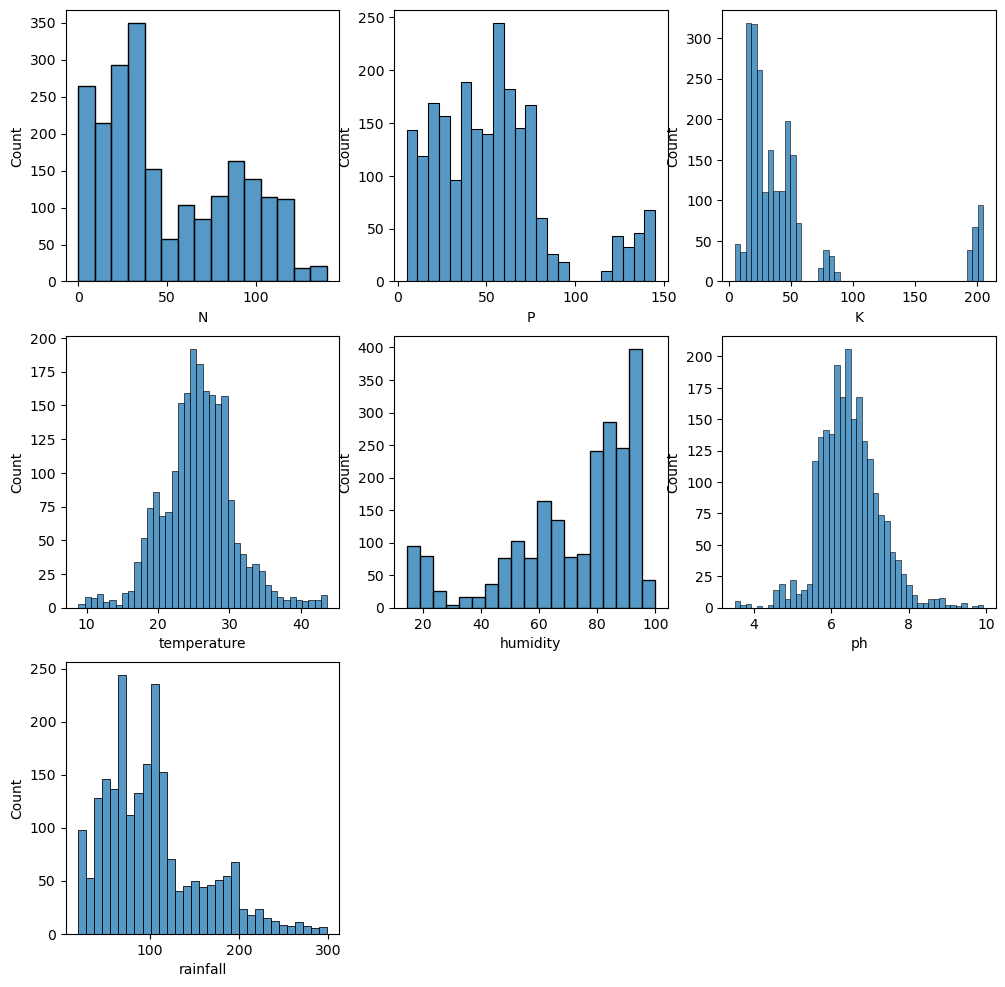

In [84]:
plt.figure(figsize=(12,12))
i=1
for col in d.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.histplot(d[col])
    i+=1

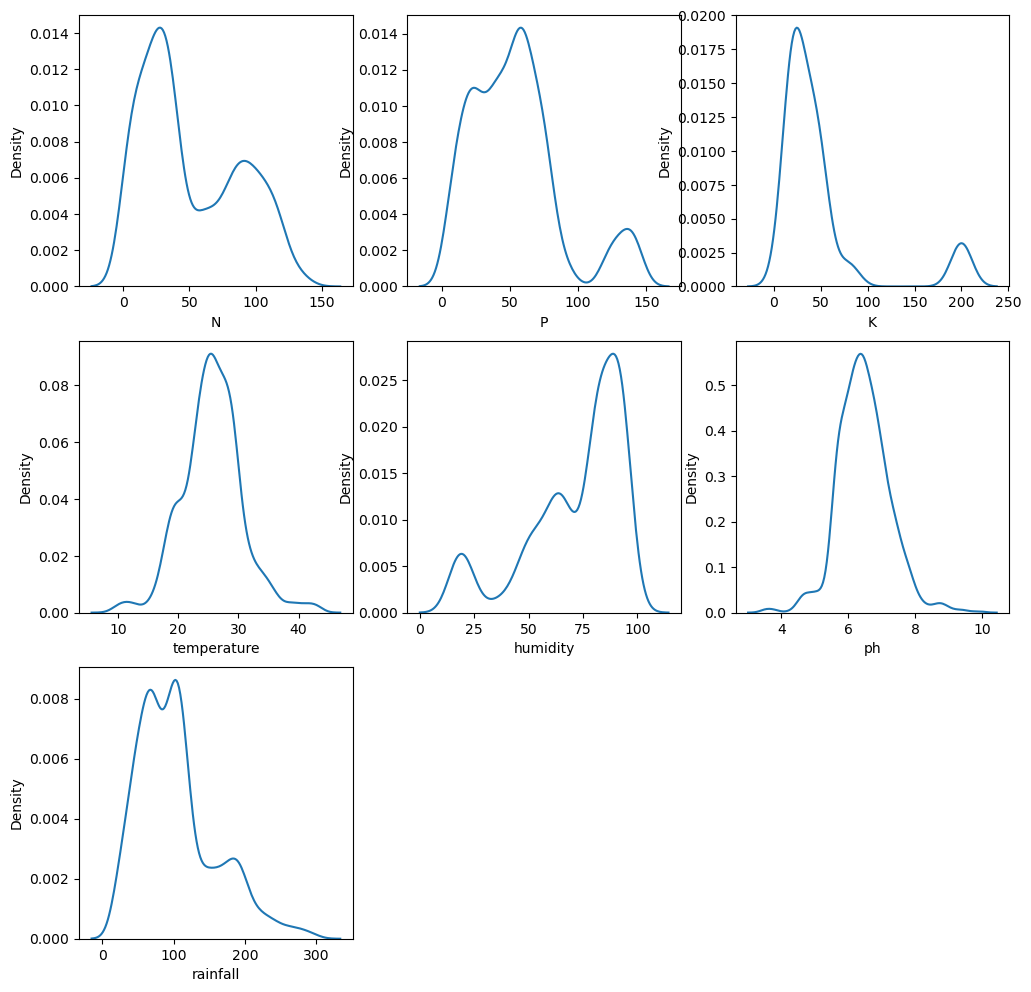

In [85]:
plt.figure(figsize=(12,12))
i=1
for col in d.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.kdeplot(d[col])
    i+=1

In [86]:
s=d[["N","P","K","temperature","humidity","ph","rainfall"]]
s.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140394,0.026504,0.190682,0.095753,0.059298
P,-0.231460,1.000000,0.736156,-0.127541,-0.118810,-0.137710,-0.064009
K,-0.140394,0.736156,1.000000,-0.160787,0.190690,-0.169703,-0.053758
temperature,0.026504,-0.127541,-0.160787,1.000000,0.204862,-0.016721,-0.030250
humidity,0.190682,-0.118810,0.190690,0.204862,1.000000,-0.009233,0.093731
ph,0.095753,-0.137710,-0.169703,-0.016721,-0.009233,1.000000,-0.114454
rainfall,0.059298,-0.064009,-0.053758,-0.030250,0.093731,-0.114454,1.000000


In [87]:
import seaborn as sns

<AxesSubplot:>

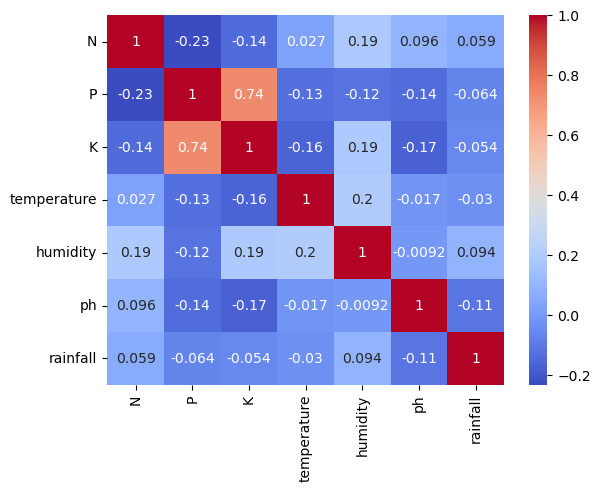

In [88]:
sns.heatmap(s.corr(),annot=True,cmap="coolwarm")

In [89]:
d["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Encoding

In [90]:
crop_dict = {
            "rice":1, 
            "maize":2, 
            "jute":3,
            "cotton":4,
             "coconut":5,
             "papaya":6,
             "orange":7,
             "apple":8,
             "muskmelon":9,
             "watermelon":10,
             "grapes":11,
             "mango":12, 
             "banana":13,
             "pomegranate":14,
             "lentil":15,
             "blackgram":16,
             "mungbean":17,
             "mothbeans":18,
             "pigeonpeas":19, 
             "kidneybeans":20, 
             "chickpea":21, 
             "coffee":22
            }



In [91]:
d["crop_num"]=d["label"].map(crop_dict)

In [92]:
d["crop_num"].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [93]:
d.drop("label",axis=1,inplace=True)
d

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43.0,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41.0,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44.0,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40.0,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42.0,20.130175,81.604873,6.467984,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32.0,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27.0,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30.0,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34.0,26.272418,52.127394,6.758793,127.175293,22


## Train Test Split-1

In [94]:
x=d.drop(['crop_num'],axis=1)
y=d['crop_num']
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Scale the featues from MinMaxScaler

In [97]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(X_train)
X_train=ms.transform(X_train)
X_test=ms.transform(X_test)
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [98]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standardisation

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [100]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68949076e-01, ...,
         9.36578663e-01,  1.95087324e-01,  4.63595595e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.71023142e-01, ...,
        -1.00678772e-01,  8.66299418e-01, -6.05892105e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53512021e-01, ...,
        -3.83037931e-01,  1.05289317e+00, -1.04647176e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.36000900e-01, ...,
        -8.98744137e-01,  7.56733647e-04, -4.42565976e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05223643e+00, ...,
         3.86226147e-01, -1.47245673e-01, -5.69633167e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.12267581e-01, ...,
        -4.18315257e-01,  6.89039141e-01, -8.97174901e-01]])

# Training Models

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9568181818181818


C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Decision Tree  with accuracy : 0.9840909090909091
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9840909090909091
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9840909090909091
Extra Trees  with accuracy : 0.9318181818181818


In [102]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred=rfc.predict(X_test)
ypred
accuracy_score(y_test,ypred)

0.9931818181818182

# Prediction

In [103]:
def recommendation(N,K,P,temperature,humidity,ph,rainfall):
    features=np.array([[N,K,P,temperature,humidity,ph,rainfall]])
    prediction=rfc.predict(ms.transform(features)).reshape(1,-1)
    return prediction[0]
predict=recommendation(5,52,17,28,12,40,500)
print(predict)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated right there".format(crop))
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")

[6]
Papaya is the best crop to be cultivated right there


C:\Users\abhin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Train Test Split -2

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# MinMaxScalar

In [36]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(X_train)
X_train=ms.transform(X_train)
X_test=ms.transform(X_test)
X_train

array([[0.15      , 0.15      , 0.11      , ..., 0.38971557, 0.34132491,
        0.27135565],
       [0.20714286, 0.21428571, 0.115     , ..., 0.45813084, 0.53848884,
        0.25177055],
       [0.42857143, 0.27857143, 0.09      , ..., 0.65071988, 0.34490059,
        0.20261886],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standardisation

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [38]:
X_train

array([[-8.14149162e-01, -8.22608476e-01, -4.17586751e-01, ...,
        -1.10914730e+00, -1.00850068e+00, -1.14762954e-01],
       [-5.99794073e-01, -5.52511028e-01, -3.98018725e-01, ...,
        -8.39738838e-01,  6.40463882e-01, -2.12947619e-01],
       [ 2.30831896e-01, -2.82413580e-01, -4.95858854e-01, ...,
        -8.13537964e-02, -9.78595756e-01, -4.59356367e-01],
       ...,
       [-1.08209302e+00, -5.22500201e-01, -3.39314648e-01, ...,
        -9.20572349e-01,  6.00471872e-04, -3.53408620e-02],
       [-1.08209302e+00,  2.11845263e+00,  3.04595380e+00, ...,
         3.79045864e-01, -1.48070939e-01, -5.55371242e-01],
       [-5.19410914e-01,  7.37954558e-01, -5.15426879e-01, ...,
        -4.34666852e-01,  6.91994073e-01, -8.79579938e-01]])

# Training Models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9590909090909091
Naive Bayes  with accuracy : 0.9939393939393939
Support Vector Machine  with accuracy : 0.9727272727272728
K-Nearest Neighbors  with accuracy : 0.9606060606060606
Decision Tree  with accuracy : 0.9818181818181818


C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest  with accuracy : 0.9924242424242424
Bagging  with accuracy : 0.990909090909091
AdaBoost  with accuracy : 0.2106060606060606
Gradient Boosting  with accuracy : 0.9833333333333333
Extra Trees  with accuracy : 0.9106060606060606


In [40]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred=rfc.predict(X_test)
ypred
accuracy_score(y_test,ypred)

0.9924242424242424

# Prediction

In [41]:
def recommendation(N,K,P,temperature,humidity,ph,rainfall):
    features=np.array([[N,K,P,temperature,humidity,ph,rainfall]])
    prediction=rfc.predict(ms.transform(features)).reshape(1,-1)
    return prediction[0]
predict=recommendation(5,52,17,28,12,40,500)
print(predict)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated right there".format(crop))
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")

[6]
Papaya is the best crop to be cultivated right there


C:\Users\abhin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Train Test Split -3

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# MinMaxScalar

In [43]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(X_train)
X_train=ms.transform(X_train)
X_test=ms.transform(X_test)
X_train

array([[0.3       , 0.40714286, 0.35      , ..., 0.05403988, 0.53012446,
        0.22115364],
       [0.        , 0.12857143, 0.05      , ..., 0.92305139, 0.62462246,
        0.32188884],
       [0.06428571, 0.36428571, 0.06      , ..., 0.61262808, 0.40984347,
        0.09395275],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43766892, 0.44414783,
        0.28736163],
       [0.07857143, 0.85      , 0.995     , ..., 0.76775145, 0.42578221,
        0.183571  ],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56108125, 0.52955682,
        0.11886358]])

# Standardisation

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [45]:
X_train

array([[-0.2619886 ,  0.27742187,  0.54808955, ..., -2.46371389,
         0.69361281, -0.38336326],
       [-1.3868839 , -0.90718975, -0.65420078, ...,  0.98262363,
         1.46525822,  0.11650713],
       [-1.14583491,  0.09517393, -0.61412443, ..., -0.24845732,
        -0.2885696 , -1.01456226],
       ...,
       [-1.09226847, -0.51231921, -0.33359002, ..., -0.9423127 ,
        -0.00844933, -0.05482453],
       [-1.09226847,  2.1606506 ,  3.13301374, ...,  0.36673305,
        -0.15841809, -0.56985663],
       [-0.52982082,  0.76341638, -0.51393357, ..., -0.45288241,
         0.6889776 , -0.89094919]])

# Training Models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9579545454545455
Naive Bayes  with accuracy : 0.9931818181818182
Support Vector Machine  with accuracy : 0.9761363636363637


C:\Users\abhin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors  with accuracy : 0.9670454545454545
Decision Tree  with accuracy : 0.9829545454545454
Random Forest  with accuracy : 0.9920454545454546
Bagging  with accuracy : 0.990909090909091
AdaBoost  with accuracy : 0.11818181818181818
Gradient Boosting  with accuracy : 0.9863636363636363
Extra Trees  with accuracy : 0.8681818181818182


# Prediction

In [48]:
def recommendation(N,K,P,temperature,humidity,ph,rainfall):
    features=np.array([[N,K,P,temperature,humidity,ph,rainfall]])
    prediction=rfc.predict(ms.transform(features)).reshape(1,-1)
    return prediction[0]
predict=recommendation(5,52,17,28,12,40,500)
print(predict)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram",17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated right there".format(crop))
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")

[6]
Papaya is the best crop to be cultivated right there


C:\Users\abhin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Naive Bayes Model

In [35]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Create and train a Naive Bayes classifier
nb = GaussianNB()
ms = StandardScaler()

# Preprocess the training data
X_train_scaled = ms.fit_transform(X_train)

# Train the Naive Bayes classifier
nb.fit(X_train_scaled, y_train)

GaussianNB()

# Prediction

In [36]:
# Function to make recommendations using the Naive Bayes classifier
def recommendation(N, K, P, temperature, humidity, ph, rainfall):
    features = np.array([[N, K, P, temperature, humidity, ph, rainfall]])
    prediction = nb.predict(ms.transform(features)).reshape(1, -1)
    return prediction[0]

predict = recommendation(5, 52, 17, 28, 12, 40, 500)
print(predict)

# Crop dictionary
crop_dict = {
    1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
    8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
    14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
    19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
}

# Determine and print the best crop to be cultivated
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best crop to be cultivated right there".format(crop))
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")


[6]
Papaya is the best crop to be cultivated right there


# Merging Columns Feature_Engineering

In [105]:
d['tmp_ph_interaction'] = d['ph'] * d['temperature']
d['tmp_ph_interaction']

0       135.780666
1       153.222607
2       180.359725
3       184.918473
4       130.201639
           ...    
2195    181.533749
2196    166.885834
2197    153.541160
2198    177.569826
2199    160.024496
Name: tmp_ph_interaction, Length: 2200, dtype: float64